In [105]:
#Importando primeiras libs 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [106]:
#Importando os dados 
df = pd.read_csv('streaming_data.csv')

# Business Understanding 

Uma plataforma de streaming está preocupada e a diretoria está preocupada com o alto índice de usuários cancelando as suas assinaturas. Eles acreditam que é possível prever se um usuário tem mais chance de deixar a plataforma antes que isso aconteça, e com base nisso tomar ações para reduzir o churn.

Com isso o objetivo do nosso modelo de classificação é ser capaz de o mesmo prever se um usuário tem mais chance de cancelar a sua assinatura na plataforma ou não. Para isso usaremos nossa base de dados 'streaming_data' a fim de manipular nosso modelo para chegar no objetivo descrito.

---

Análise Exploratória

In [107]:
#Vendo infos gerais 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [108]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [109]:
#Contando valores nulos por coluna
df.isna().sum()
#Contando total de valores nulos (soma)
df.isna().sum().sum()

199940

In [110]:
#Vendo dimensão do df 
df.shape

(77884, 10)

In [111]:
#Analisando o df
df.head(10)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f
5,54.0,Male,3024.0,2.0,Basic,NaN,1,NaN,0.0,a1df3a13-9255-4d00-8a9d-20565fefaab9
6,62.0,Female,5569.0,2.0,NaN,2.0,2,4.92,0.0,a6218fa0-84da-4bac-a7fc-ce991fdc188a
7,56.0,Male,462.0,1.0,NaN,3.0,4,3.74,1.0,9ea4f106-8533-4ee2-b7b5-31691f82b72e
8,25.0,Female,3783.0,3.0,NaN,1.0,2,2.92,0.0,2c6f08fb-82be-4e3d-b40d-6aea787c3bd5
9,21.0,Female,112.0,2.0,Basic,NaN,3,2.57,1.0,c6f0b9be-dd53-42a3-8efd-1ad7dcdda167


# Data Understanding

Nossa base é composta por um total de 77.884 linhas e 10 colunas.

Seguem as colunas com seus respectivos tipos de dados:


- User_id: Código de identificação do cliente. - Tipo de dado: Int

- age: Idade do cliente. - Tipo de dado: Int

- gender: Gênero do cliente. - Tipo de dado: String

- Time_on_platform: Tempo na plataforma. - Tipo de dado: Int

- subscription_type: Tipo de conta. - Tipo de dado: String


- avg_rating: Avaliação média dos conteúdos da plataforma. - Tipo de dado: Int

- num_active_profiles: Número de perfis ativos na plataforma. - Tipo de dado:Int

- num_streaming_services: Quantidade de serviços de streaming que o cliente possui. - Tipo de dado: Int

- devices_connected: Quantidade de dispositivos conectados à conta. - Tipo de dado: Int

- churned: Se o cliente cancelou a conta ou não. - Tipo de dado: Int

---
Nosso dataset contém colunas com valores nulos, segue cada coluna com a soma de todos os nulos:

- Age             =          11277
- Gender                    14516
- Time_on_platform      =    21420
- Devices_connected    =     25188
- Subscription_type      =  25221
- Num_streaming_services  =  68312
- Num_active_profiles    =       0
- Avg_rating       =         17270
- Churned        =           16736
- User_id        =               0 
 
 Total de nulos: 199940

Distribuição de Churn

In [112]:
#Vendo primeiramente a distribuição de Churn
df['Churned'].value_counts()

Churned
0.0    46285
1.0    14863
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x24dcba904d0>,
 [Text(0, 0, 'Não churn'), Text(1, 0, 'Churn')])

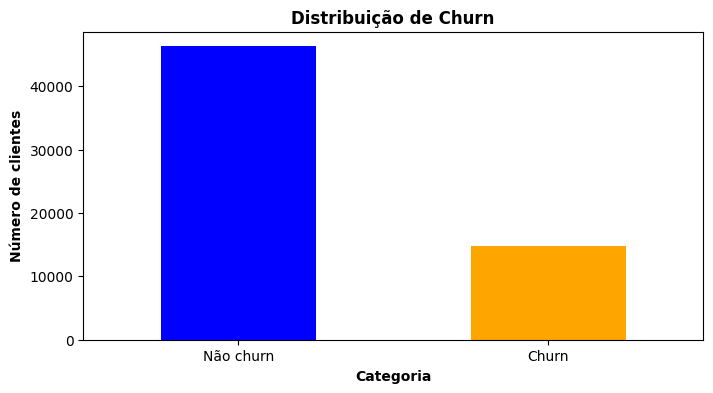

In [113]:
#Variável para montar o gráfico 
churn = df['Churned'].value_counts()

#Gráfico
fig = plt.figure(figsize=(8,4))
churn.plot(kind='bar', color= ['Blue','Orange'])

#Configurando 
plt.title('Distribuição de Churn',fontweight= 'bold')
plt.xlabel('Categoria',fontweight= 'bold')
plt.ylabel('Número de clientes',fontweight= 'bold')

#Mudando os valores 0 e 1 por Não Churn e Churn 
plt.xticks(ticks=[0,1],labels=['Não churn', 'Churn'], rotation=0)

Distribuição de planos de assinatura

In [114]:
df['Subscription_type'].value_counts()

Subscription_type
Premium     17625
Basic       17527
Standard    17511
Name: count, dtype: int64

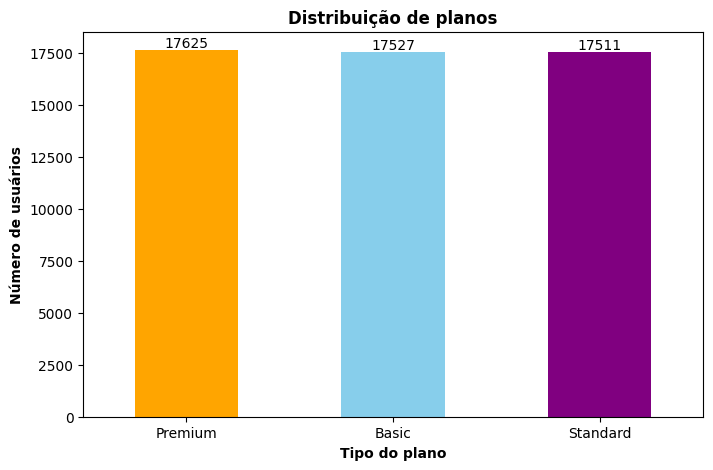

In [115]:
#Variável 
plan = df['Subscription_type'].value_counts()

#Gráfico 
fig = plt.figure(figsize=(8,5))
ax = plan.plot(kind='bar', color=['Orange','Skyblue','Purple'])

#Configurações gerais
plt.title('Distribuição de planos', fontweight= 'bold')
plt.xlabel('Tipo do plano',fontweight= 'bold')
plt.ylabel('Número de usuários',fontweight= 'bold')

#Configurando eixo x
plt.xticks(rotation=0)

#Adicionando valores totais acima de cada barra
for plano, value in enumerate(plan):
    ax.text(plano, value + 1, str(value), ha='center', va='bottom', fontsize=10, color='black')

Média de tempo na plataforma por idade

([<matplotlib.axis.XTick at 0x24dc9073e10>,
 [Text(0, 0, '33'),
  Text(1, 0, '67'),
  Text(2, 0, '28'),
  Text(3, 0, '22'),
  Text(4, 0, '21')])

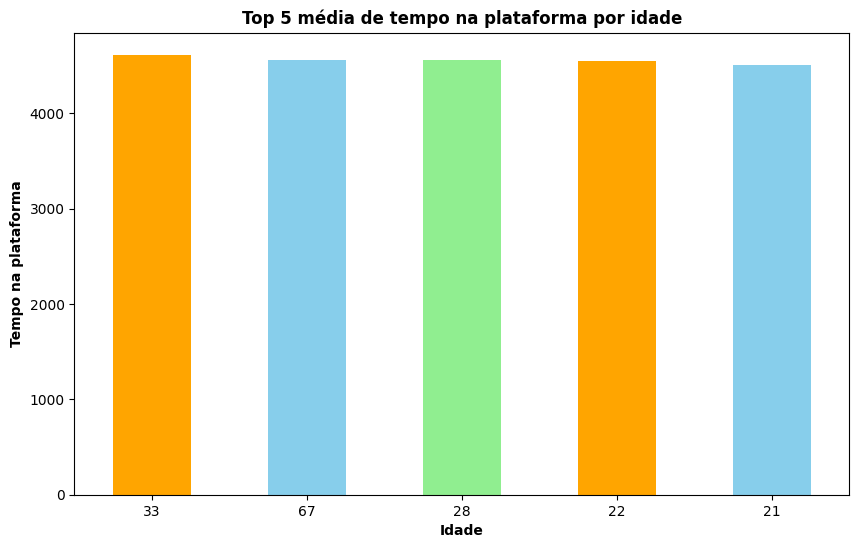

In [116]:
#Variável de média de avaliação 
temp_age = df.groupby('Age')['Time_on_platform'].mean().sort_values(ascending=False)
temp_age

# Selecionar apenas as 5 idades com maior tempo médio
top_5_temp_age = temp_age.nlargest(5)

#Grafico 
fig = plt.figure(figsize=(10,6))
top_5_temp_age.plot(kind='bar', color=['orange','skyblue','lightgreen'])


plt.title('Top 5 média de tempo na plataforma por idade', fontweight='bold')
plt.xlabel('Idade', fontweight='bold')
plt.ylabel('Tempo na plataforma', fontweight='bold')

#Mudando a visualização das idades para inteiros 
plt.xticks(ticks=[0,1,2,3,4], labels=[33, 67, 28, 22,21], rotation=0)



# Data Preparation 
Tratando dados nulos:
 - Vamos fazer a substituição dos valores nulos/NaN por o número 0 nas seguintes colunas: Time_on_platform,
Num_streaming_services, Churned, Avg_rating, Devices_connected .

 - Dropar linhas nulas nas colunas Gender, Subscription_type e Age.

 

In [117]:
#Analisando vales nulos 
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

Transformando valores 0 por 'No' e 'Yes' na coluna 'Churned'

In [118]:
#Transformando valores 0 e 1 por 'No' e 'Yes' na coluna 'Churned'
df['Churned'] = df['Churned'].replace({0:'No', 1: 'Yes'})
df['Churned'].value_counts()

Churned
No     46285
Yes    14863
Name: count, dtype: int64

Substindo NaN por 0 em colunas específicas

In [119]:
#Substindo NaN por 0 em colunas específicas 
colunas = ['Time_on_platform','Num_streaming_services','Churned','Avg_rating','Devices_connected']
for col in colunas:
    df[col] = df[col].fillna(0)

Dropar valores nulos nas coluna 'Gender', 'Subscription_type' e 'Age'

In [120]:
#Dropar valores nulos nas coluna 'Gender', 'Subscription_type' e 'Age'
cols = ['Gender','Subscription_type','Age']

for col in cols:
    df.dropna(subset =[col], inplace= True)

In [121]:
#Verificand o tratamento de nulos
df.isna().sum()

Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
User_id                   0
dtype: int64

Trocando valores 0 por 'No' na minha coluna 'Churned'

In [122]:
#Fazendo o replace por 'No' em valores 0
df['Churned'] = df['Churned'].replace({0:'No'})

#Validando
df['Churned'].value_counts()

Churned
No     29459
Yes     7056
Name: count, dtype: int64

Tranformando valores 'float' para 'int'
 - Vamos analisar as colunas que tenham valores em 'float' e converter os mesmos para inteiros.

In [123]:
#Analisando tipos dos dados 
df.dtypes

#Variável de dados tipo float 
floats = df.select_dtypes(include='float64').columns

#Tansformando em int 
for col in floats:
    df[col] = df[col].astype(int)

df.dtypes

Age                        int32
Gender                    object
Time_on_platform           int32
Devices_connected          int32
Subscription_type         object
Num_streaming_services     int32
Num_active_profiles        int64
Avg_rating                 int32
Churned                   object
User_id                   object
dtype: object

# Modeling 
 - Para a etapa vamos testar dois modelos: Regressão Logistica e o Random Forest Classifier. 
 - Aplicando ambos os modelos vamos calcular as métricas para identificar qual modelo se comportou de maneiras mais eficaz.
 - Po ultimos vamos tentar, se possível, melhorar o modelo que melhor performou com o tunning e otimização de hiperparametros.
 ---

Definindo x e y 

In [124]:
#Primeiramente vamos definir nossas features e nossa vriável target 
x = df.drop(columns=['Churned','User_id'])
y = df['Churned'].copy() # Garantir que y é atualizado


Separando meu x em categorias com get dummies

In [125]:
x = pd.get_dummies(x)
x

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
0,49,4700,3,0,3,0,False,True,True,False,False
1,69,6107,2,0,1,2,True,False,False,False,True
2,44,6374,3,1,1,1,False,True,False,True,False
3,26,0,5,0,2,0,False,True,True,False,False
5,54,3024,2,0,1,0,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
77879,45,0,0,0,5,2,False,True,True,False,False
77880,47,6176,0,0,2,4,True,False,False,True,False
77881,64,0,5,0,1,4,True,False,False,True,False
77882,58,1314,5,0,4,0,False,True,False,False,True


Normalização 

In [126]:
#Importand lib 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Aplicando 
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x


,0,1,2,3,4,5,6,7,8,9,10
0,0.607843,0.536591,0.6,0.00,0.50,0.0,0.0,1.0,1.0,0.0,0.0
1,1.000000,0.697226,0.4,0.00,0.00,0.4,1.0,0.0,0.0,0.0,1.0
2,0.509804,0.727709,0.6,0.25,0.00,0.2,0.0,1.0,0.0,1.0,0.0
3,0.156863,0.000000,1.0,0.00,0.25,0.0,0.0,1.0,1.0,0.0,0.0
4,0.705882,0.345245,0.4,0.00,0.00,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
36510,0.529412,0.000000,0.0,0.00,1.00,0.4,0.0,1.0,1.0,0.0,0.0
36511,0.568627,0.705103,0.0,0.00,0.25,0.8,1.0,0.0,0.0,1.0,0.0
36512,0.901961,0.000000,1.0,0.00,0.00,0.8,1.0,0.0,0.0,1.0,0.0
36513,0.784314,0.150017,1.0,0.00,0.75,0.0,0.0,1.0,0.0,0.0,1.0


Definindo variáveis de treino e teste

In [127]:
#Imporando a lib 
from sklearn.model_selection import train_test_split

#Aplicando nas variáveis x e y 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y)

Configurando os indices para não aparecer valores 'NaN' posteriormente

In [128]:
# Verificar alinhamento de índices
print("Índices de x_test:", x_test.index)
print("Índices de y_test:", y_test.index)

# Resetar índices para evitar desalinhamento
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

Índices de x_test: Index([13304, 22523, 30533,  3043,   885, 29970, 19793,  5941,  2699, 10370,
       ...
       14919, 28485, 32819, 23875,  7659, 19007, 32546,  3161, 19247, 23375],
      dtype='int64', length=7303)
Índices de y_test: Index([28385, 47799, 65041,  6538,  1871, 63786, 41962, 12542,  5785, 22086,
       ...
       31857, 60628, 70038, 50789, 16210, 40349, 69440,  6787, 40864, 49661],
      dtype='int64', length=7303)


In [129]:
# Reconfirmar que y_test não contém NaN
print("Valores únicos em y_test após reset:", y_test.unique())

Valores únicos em y_test após reset: ['No' 'Yes']


# Regressão Logistica 

In [130]:
#Importando a lib e definindo 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')

#Aplicando 
rl = model.fit(x_train,y_train)

#Predição 
rl.predict(x_test)

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

Unindo minha target e a predição na minha base de teste

In [131]:
x_test.assign(Churn=y_test).assign(Predict=rl.predict(x_test)) #Churn = dados reais / Predict = predição 

,0,1,2,3,4,5,6,7,8,9,10,Churn,Predict
0,0.156863,0.562735,0.6,0.00,0.75,0.8,1.0,0.0,0.0,1.0,0.0,No,Yes
1,0.509804,0.409978,0.2,0.00,1.00,0.6,1.0,0.0,0.0,1.0,0.0,No,No
2,0.039216,0.000000,0.6,0.00,0.75,0.2,1.0,0.0,1.0,0.0,0.0,No,Yes
3,0.019608,0.626327,1.0,0.25,0.25,0.8,0.0,1.0,1.0,0.0,0.0,No,Yes
4,0.784314,0.000000,0.2,0.00,0.00,0.4,0.0,1.0,0.0,1.0,0.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,0.490196,0.000000,0.2,0.75,0.75,0.8,0.0,1.0,0.0,0.0,1.0,No,Yes
7299,0.666667,0.922137,0.0,0.00,1.00,0.2,1.0,0.0,0.0,1.0,0.0,No,No
7300,0.215686,0.817331,0.0,0.00,1.00,0.4,0.0,1.0,1.0,0.0,0.0,No,No
7301,0.450980,0.000000,0.0,0.00,0.25,0.0,1.0,0.0,0.0,1.0,0.0,No,No


Matriz de Confusão

<Figure size 1000x600 with 0 Axes>

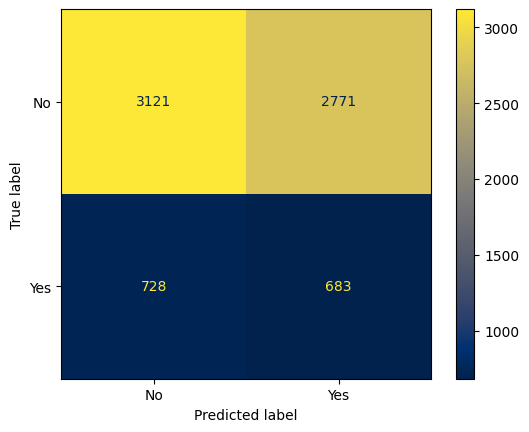

In [132]:
#Importando a lib da Matriz de Confusão 
import matplotlib.pyplot as plt 
from sklearn.metrics import ConfusionMatrixDisplay

# Definir esquema de cores
cmap = sns.color_palette('cividis', as_cmap=True)

#Plotando a Matriz 
fig = plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_estimator(rl,x_test,y_test, cmap=cmap)

Métricas do modelo de Regressão Logistica
- Exibindo as métricas de accurácia do modelo

In [133]:
#Importando lib de métricas 
from sklearn.metrics import accuracy_score, balanced_accuracy_score
#Printando as métricas 
print(f'Acurácia (Treino): {accuracy_score(y_train,rl.predict(x_train))}')
print(f"Acurácia (Teste): {accuracy_score(y_test, rl.predict(x_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rl.predict(x_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rl.predict(x_test))}")


Acurácia (Treino): 0.5181089963028892
Acurácia (Teste): 0.5208818293851841
Acurácia Balanceada (Treino): 0.5066766657359643
Acurácia Balanceada (Teste): 0.5068775761967241


# Random Forest

In [134]:
#Importando a lib 
from sklearn.ensemble import RandomForestClassifier

#Definindo 
rf = RandomForestClassifier()

Treinando o modelo e predição

In [135]:
#Treinando o modelo
rf.fit(x_train,y_train)


RandomForestClassifier()

In [136]:
#Fazendo a predição
rl.predict(x_test)

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

Unindo minha target e a predição com o cojunto de teste

In [137]:
x_test.assign(Churn= y_test).assign(Predict=rl.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,10,Churn,Predict
0,0.156863,0.562735,0.6,0.00,0.75,0.8,1.0,0.0,0.0,1.0,0.0,No,Yes
1,0.509804,0.409978,0.2,0.00,1.00,0.6,1.0,0.0,0.0,1.0,0.0,No,No
2,0.039216,0.000000,0.6,0.00,0.75,0.2,1.0,0.0,1.0,0.0,0.0,No,Yes
3,0.019608,0.626327,1.0,0.25,0.25,0.8,0.0,1.0,1.0,0.0,0.0,No,Yes
4,0.784314,0.000000,0.2,0.00,0.00,0.4,0.0,1.0,0.0,1.0,0.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,0.490196,0.000000,0.2,0.75,0.75,0.8,0.0,1.0,0.0,0.0,1.0,No,Yes
7299,0.666667,0.922137,0.0,0.00,1.00,0.2,1.0,0.0,0.0,1.0,0.0,No,No
7300,0.215686,0.817331,0.0,0.00,1.00,0.4,0.0,1.0,1.0,0.0,0.0,No,No
7301,0.450980,0.000000,0.0,0.00,0.25,0.0,1.0,0.0,0.0,1.0,0.0,No,No


Matriz de confusão

<Figure size 1000x600 with 0 Axes>

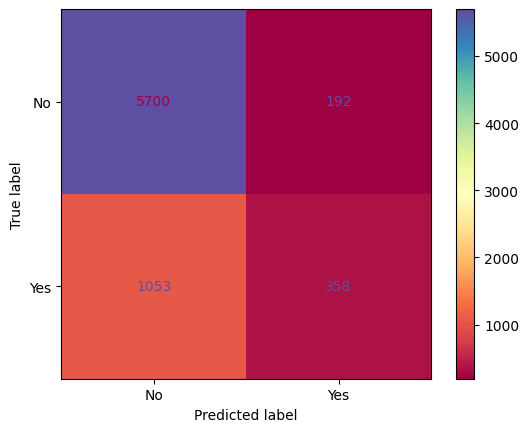

In [138]:
#Importando libs 
import matplotlib.pyplot as plt 
from sklearn.metrics import ConfusionMatrixDisplay

# Definir esquema de cores
cmap = sns.color_palette('Spectral', as_cmap=True)

#Plotando a Matriz de confusão
fig = plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_estimator(rf,x_test,y_test,cmap=cmap)


Métricas de Acurácia

In [139]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(x_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(x_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(x_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(x_test))}")

Acurácia (Treino): 0.9947624264001096
Acurácia (Teste): 0.829522114199644
Acurácia Balanceada (Treino): 0.9892098561653162
Acurácia Balanceada (Teste): 0.6105671036848965


Resultado 
 - Após comparar os resultados de Acurácia de ambos os moelos, Regressão Logística e Random Forest, podemos concluír que o modelo de Rf 
 se saiu muito melhhor do que comparado ao modelo de Rl.
 
 - Porém podemos notar que houve um percentual de Overfitting no modelo.
 
 - Agora iremos usar o GridSearch para tentar encontrar melhores parametros para o modelos de Rf para fazer o tunning no mesmo 
 para tentarmos melhorar a questão do Overfitting das nossa métricas.

# Grid Search

GridSearch com o RandomForest
- Agora vamos implantar o GridSearch para tentar achar melhores parâmetros e otimizar nosso modelo deo Rf 
para melhorar nossas métricas de accurácia.

In [140]:
#Importando a lib 
from sklearn.model_selection import GridSearchCV

#Definindo os parâmetros 
parameters = {'max_depth' :[1,2,3,4,5,6,7,8,9,10],
              'n_estimators' : [100,300,500]}

#Implantando a accuracia 
grid_search = GridSearchCV(estimator=rf, param_grid=parameters, scoring= 'accuracy', cv=5, n_jobs= -1)

Treinando o GridSearch

In [141]:
#Treinando o Grid 
grid_search.fit(x_train,y_train)
grid_search


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

Obtendo melhores parâmetros

In [148]:
best_params = grid_search.best_estimator_.get_params()
best_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Aplicando os melhores hiperparâmetros no Random Forest

In [149]:
#Importando a lib do modelo 
from sklearn.ensemble import RandomForestClassifier

#Implantando o tunning
rf_tunned = RandomForestClassifier(bootstrap = True,
 ccp_alpha =  0.0,
 class_weight = None,
 criterion = 'gini',
 max_depth = 10,
 max_features = 'sqrt',
 max_leaf_nodes = None,
 max_samples = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 monotonic_cst = None,
 n_estimators = 100,
 n_jobs = None,
 oob_score = False,
 random_state = None,
 verbose = 0,
 warm_start = False)

Treinando o modelo tunado
- Após tunar o modelo vamos treinar o modelo novamente

In [150]:
#Treinando o modelo tunado
rf_tunned.fit(x_train,y_train)

#Predição
rf_tunned.predict(x_test)


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [151]:
#Assign para juntar com a base de teste
x_test.assign(Churn = y_test).assign(Predict = rf_tunned.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,10,Churn,Predict
0,0.156863,0.562735,0.6,0.00,0.75,0.8,1.0,0.0,0.0,1.0,0.0,No,No
1,0.509804,0.409978,0.2,0.00,1.00,0.6,1.0,0.0,0.0,1.0,0.0,No,No
2,0.039216,0.000000,0.6,0.00,0.75,0.2,1.0,0.0,1.0,0.0,0.0,No,No
3,0.019608,0.626327,1.0,0.25,0.25,0.8,0.0,1.0,1.0,0.0,0.0,No,No
4,0.784314,0.000000,0.2,0.00,0.00,0.4,0.0,1.0,0.0,1.0,0.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,0.490196,0.000000,0.2,0.75,0.75,0.8,0.0,1.0,0.0,0.0,1.0,No,No
7299,0.666667,0.922137,0.0,0.00,1.00,0.2,1.0,0.0,0.0,1.0,0.0,No,No
7300,0.215686,0.817331,0.0,0.00,1.00,0.4,0.0,1.0,1.0,0.0,0.0,No,No
7301,0.450980,0.000000,0.0,0.00,0.25,0.0,1.0,0.0,0.0,1.0,0.0,No,No


Matriz de Confusão com o tunning do modelo 

<Figure size 1000x600 with 0 Axes>

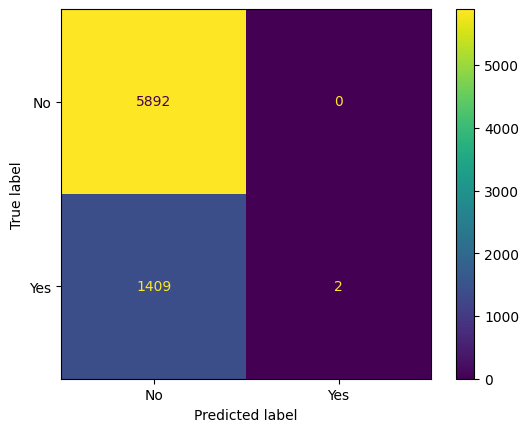

In [152]:
#Importando libs 
import matplotlib.pyplot as plt 
from sklearn.metrics import ConfusionMatrixDisplay

#Plotando a Matriz de confusão
fig = plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_estimator(rf_tunned,x_test,y_test)

Acurácia do Random Forest tunado

In [154]:
#Lib das métricas 
from sklearn.metrics import accuracy_score, balanced_accuracy_score

#Definindo as métricas 
print(f'Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(x_train))}')
print(f'Acurácia (Testte) : {accuracy_score(y_test, rf_tunned.predict(x_test))}')


Acurácia (Treino): 0.808024099685061
Acurácia (Testte) : 0.8070655894837738


# Conclusão do modelo
- Após fazer o tunning do modelo do RandomForestClassifier, conseguimos obter uma grande redução do Overfitting presente anteriormente 
antes de tunar o modelo.
- Com isso o modelo a ser usado ficou o RandomForestRegressor com os hiperparametros otimizados.